<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

### Setup imports

In [ ]:
from bioMONAI.data import *
from bioMONAI.transforms import *
from bioMONAI.core import *
from bioMONAI.core import Path
from bioMONAI.losses import *
from bioMONAI.metrics import *
from bioMONAI.datasets import download_medmnist
from bioMONAI.visualize import show_images_grid, mosaic_image_3d
from bioMONAI.data import get_image_files

In [ ]:
device = get_device()
print(device)

cuda


### Download and store the dataset

In [ ]:
data_flag = 'synapsemnist3d'
data_path = Path('../_data/medmnist_data/')

info = download_medmnist(data_flag, data_path, download_only=True)

data_path = data_path/'synapsemnist3d'
train_path = data_path/'train'
val_path = data_path/'val'
test_path = data_path/'test'

Dataset 'synapsemnist3d' is already downloaded and available in '../_data/medmnist_data/synapsemnist3d'.


### Create Dataloader

In [ ]:
batch_size = 8

data = BioDataLoaders.class_from_folder(
    data_path,
    train='train',
    valid='val',
    vocab=info['label'],
    item_tfms=[ScaleIntensity(), RandRot90(prob=0.5, spatial_axes=(1,2)), Resize(32)],
    batch_tfms=None,
    img_cls=BioImageStack,
    bs=batch_size,
    show_summary=True,
    )

# print length of training and validation datasets
print('train images:', len(data.train_ds.items), '\nvalidation images:', len(data.valid_ds.items))

Setting-up type transforms pipelines
Found 1407 items
2 datasets of sizes 1230,177
Setting up Pipeline: BioImageBase.create -> Tensor2BioImage -- {}
Setting up Pipeline: parent_label -> Categorize -- {'vocab': ['0', '1'], 'sort': True, 'add_na': False}

Building one sample
  Pipeline: BioImageBase.create -> Tensor2BioImage -- {}
    starting from
      ../_data/medmnist_data/synapsemnist3d/train/1/train_865.tiff
    applying BioImageBase.create gives
      BioImageStack of size 1x28x28x28
    applying Tensor2BioImage -- {} gives
      BioImageStack of size 1x28x28x28
  Pipeline: parent_label -> Categorize -- {'vocab': ['0', '1'], 'sort': True, 'add_na': False}
    starting from
      ../_data/medmnist_data/synapsemnist3d/train/1/train_865.tiff
    applying parent_label gives
      1
    applying Categorize -- {'vocab': ['0', '1'], 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (BioImageStack([[[[0.8039, 0.8706, 0.4980,  ..., 0.4353, 0.1451, 0.2157],
       

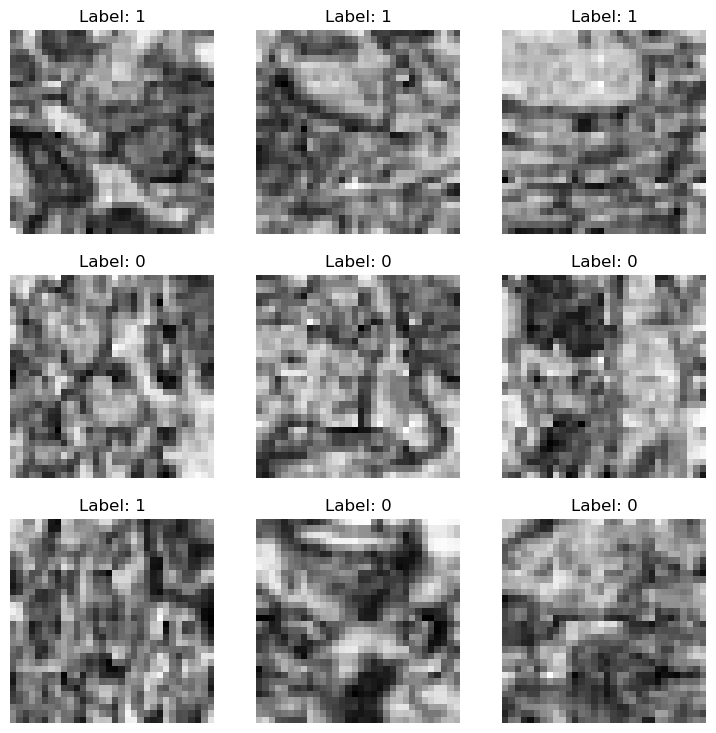

In [ ]:
data.show_batch()

### Load and train a 3D model

SEResNet50 (Input shape: 16 x 1 x 32 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 64 x 16 x 16 x 
Conv3d                                    21952      True      
BatchNorm3d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 64 x 8 x 8 x 8 
MaxPool3d                                                      
Conv3d                                    4096       True      
BatchNorm3d                               128        True      
ReLU                                                           
Conv3d                                    110592     True      
BatchNorm3d                               128        True      
ReLU                                                           
____________________________________________________________________________
          

Inferred learning rate:  3e-05


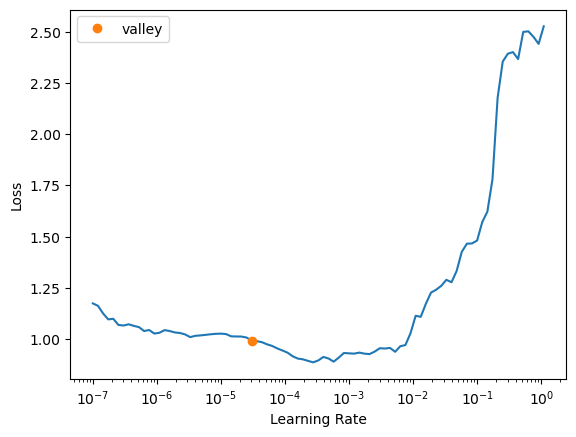

In [ ]:
from monai.networks.nets import DenseNet169, SEResNet50
from fastai.vision.all import BalancedAccuracy, CrossEntropyLossFlat, Learner
# from torch.nn import CrossEntropyLoss

# model = DenseNet169(spatial_dims=3, in_channels=1, out_channels=2)
model = SEResNet50(spatial_dims=3, in_channels=1, num_classes=2)

loss = CrossEntropyLossFlat()
metric = BalancedAccuracy()

trainer = fastTrainer(data, model, loss_fn=loss, metrics=metric, show_summary=True, find_lr=True)

epoch,train_loss,valid_loss,balanced_accuracy_score,time
0,0.635229,0.621256,0.480862,00:03
1,0.551267,0.631951,0.493944,00:03
2,0.503740,0.617897,0.543120,00:03
3,0.455072,0.631129,0.538033,00:03
4,0.431959,0.676425,0.548692,00:03
5,0.410487,0.708722,0.552810,00:03
6,0.383551,0.726638,0.556686,00:03
7,0.350918,0.741261,0.574855,00:03
8,0.318454,0.719016,0.562016,00:03
9,0.292503,0.710118,0.588905,00:03


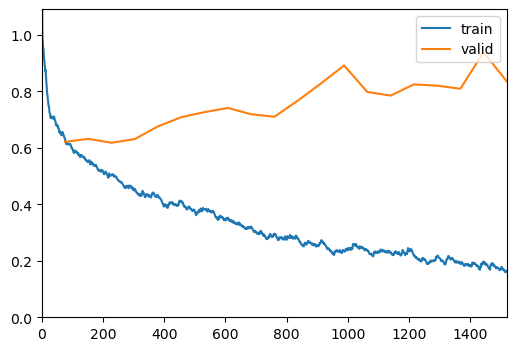

In [ ]:
trainer.fit(20)

In [ ]:
#trainer.show_results(cmap='gray')

In [ ]:
# trainer.save('tmp-model')

### Test data 
Evaluate the performance of the selected model on unseen data.
It’s important to not touch this data until you have fine tuned your model to get an unbiased evaluation!

In [ ]:
test_data = data.test_dl(get_image_files(test_path), with_labels=True)
# print length of test dataset
print('test images:', len(test_data))

test images: 22


              precision    recall  f1-score   support

           0       0.45      0.25      0.32        95
           1       0.76      0.89      0.82       257

    accuracy                           0.72       352
   macro avg       0.61      0.57      0.57       352
weighted avg       0.68      0.72      0.69       352


Most Confused Classes:


[('0', '1', 71), ('1', '0', 29)]


,Value
CrossEntropyLossFlat,
Mean,0.579085
Median,0.365717
Standard Deviation,0.352170
Min,0.313332
Max,1.312281
Q1,0.321334
Q3,0.799577


{'CrossEntropyLossFlat': [0.774454653263092,
  0.318200021982193,
  0.33017563819885254,
  0.41057121753692627,
  0.31440508365631104,
  0.844761073589325,
  0.3220670819282532,
  0.48011723160743713,
  0.34339386224746704,
  0.7992609143257141,
  0.3209790885448456,
  0.3213556110858917,
  0.3668822646141052,
  0.31483641266822815,
  0.33703890442848206,
  0.315140038728714,
  0.3237593173980713,
  0.3263738453388214,
  0.316360741853714,
  0.3779691457748413,
  0.3395267128944397,
  0.471957802772522,
  0.3599473834037781,
  0.3186264932155609,
  0.4891008734703064,
  0.31581777334213257,
  0.34245723485946655,
  0.3148588538169861,
  0.3142279386520386,
  0.3137844204902649,
  0.3407739996910095,
  0.3138473927974701,
  1.2550413608551025,
  0.6138912439346313,
  0.319322407245636,
  0.36110880970954895,
  1.2329554557800293,
  0.3185996413230896,
  0.3134235739707947,
  0.32176312804222107,
  0.9185994863510132,
  0.3147069215774536,
  0.3383767306804657,
  0.33764490485191345,
  0

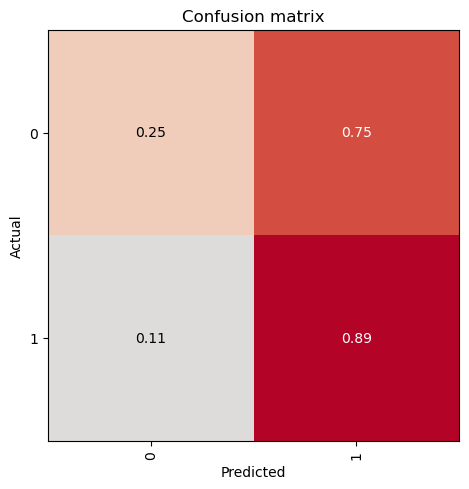

In [ ]:
evaluate_classification_model(trainer, test_data, show_graph=False, show_results=False)